# Import modules

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from IPython.display import clear_output
os.chdir(os.environ['HOME'] + '/Google Drive/Research/Project_LandSeaContrast/')
print(os.getcwd())
import myfuncs as my
from IPython.display import display
    # for displaying pandas tables
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ldavis/Google Drive/Research/Project_LandSeaContrast/'

# Sorting test

In [34]:
print(np.arange(5).shape, np.random.rand(5).shape)
np.interp((0.5,1.5,2.5), range(5),a)

(5,) (5,)


array([ 0.48228162,  0.51534253,  0.50932055])

In [25]:
help(np.interp)

Help on function interp in module numpy.lib.function_base:

interp(x, xp, fp, left=None, right=None, period=None)
    One-dimensional linear interpolation.
    
    Returns the one-dimensional piecewise linear interpolant to a function
    with given values at discrete data-points.
    
    Parameters
    ----------
    x : array_like
        The x-coordinates of the interpolated values.
    
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points, same length as `xp`.
    
    left : optional float or complex corresponding to fp
        Value to return for `x < xp[0]`, default is `fp[0]`.
    
    right : optional float or complex corresponding to fp
        Value to return for `x > xp[-1]`, defa

# Vector matching tools

In [5]:
from importlib import reload
reload(my)
a = pd.DataFrame({'a':[1,2],'b':[3,4]},
                 index=[datetime(1970,1,1),datetime(1970,2,1)])
b = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]},index=[datetime(1970,1,1),datetime(1970,2,1),datetime(1970,3,1)])
idfilt, filt = my.match(a.index,b.index)
print('Loc:',a.loc[a.index[filt[0]]])
print('iLoc:',a.iloc[1:2,:])
print('iLoc, converting to Series:',a.iloc[1,:])
try:
    print('Simple index:',a[idfilt])
except:
    print('Loc index with ids:',a.loc[idfilt])
    print('Must use .loc to filter with IndexType.')
print('Index month:',a.index[0].month)
print('Index type:',type(a.index))
print('Sum, converting to Series:',b.sum(0))
print('Values:', a.index.values, type(a.index.values[0]), type(a.index.values))

Loc:             a  b
1970-01-01  1  3
1970-02-01  2  4
iLoc:             a  b
1970-02-01  2  4
iLoc, converting to Series: a    2
b    4
Name: 1970-02-01 00:00:00, dtype: int64
Loc index with ids:             a  b
1970-01-01  1  3
1970-02-01  2  4
Must use .loc to filter with IndexType.
Index month: 1
Index type: <class 'pandas.tseries.index.DatetimeIndex'>
Sum, converting to Series: a     6
b    15
dtype: int64
Values: ['1970-01-01T00:00:00.000000000' '1970-02-01T00:00:00.000000000'] <class 'numpy.datetime64'> <class 'numpy.ndarray'>


# Datetime stuff

In [401]:
x = [datetime(y,1,1) for y in range(2000,2010)]
y = np.datetime64(x)

ValueError: Could not convert object to NumPy datetime

# Pandas Dataframe Stuff

## Grouping with datetime indices

In [570]:
# integer grouping
d = pd.DataFrame(dict(col1=[2,1,3,1,0]))
d.index//3
    # just like array division; then groups rows with common indices into
    # this abstract "GroupBy" object onto which you can apply operations!
f = d.groupby(d.index // 3).mean()
display(f)
# datetime grouping
c = pd.DataFrame(dict(a=[1,2,3,4]), 
                 index=[datetime(1970,1,1), datetime(1970,2,1), 
                        datetime(1971,1,1), datetime(1971,2,1)])
display(c)
cy = c.groupby(c.index.year).mean()
print('Yearly mean:')
display(cy)
cm = c.groupby(c.index.month).mean()
print('Monthly mean:')
display(cm)
print('January filter:')
mfilt = c.loc[c.index.month==1]
display(mfilt)
# or try mask
print(c.index.month)
np.in1d(c.index.month,[1,12])

,col1
0,2.0
1,0.5


,a
1970-01-01,1
1970-02-01,2
1971-01-01,3
1971-02-01,4


Yearly mean:


,a
1970,1.5
1971,3.5


Monthly mean:


,a
1,2
2,3


January filter:


,a
1970-01-01,1
1971-01-01,3


[1 2 1 2]


array([ True, False,  True, False], dtype=bool)

## Seasonal means with groupby

In [599]:
# and try seasonal means using groupby
c = pd.DataFrame(dict(a=range(24)), 
                 index=[datetime(1970,i,1) for i in range(1,13)] + 
                [datetime(1971,i,1) for i in range(1,13)])
season_mean = c.groupby((c.index.year + (c.index.month // 12), c.index.month % 12 // 3)).mean()
display('season mean:',season_mean)
display('index level 1:',season_mean.index.levels[0])
try:
    season_mean.groupby(season_mean.index.levels[0]).mean()
except:
    print('Grouping by with index reference does not work, because'
          + 'pandas returns only the unique ids in order!')
# instead use groupby option
display('Annual mean:',season_mean.groupby(level=0).mean())
display('')

'season mean:'

a
1970 0   0.5
     1   3.0
     2   6.0
     3   9.0
1971 0  12.0
     1  15.0
     2  18.0
     3  21.0
1972 0  23.0

'index level 1:'

Int64Index([1970, 1971, 1972], dtype='int64')

Grouping by with index reference does not work, becausepandas returns only the unique ids in order!


,a
1970,4.625
1971,16.500
1972,23.000


## Building a MultiIndex from scratch/suppressing new one in groupby

In [667]:
# multiindexing, and applying inline running mean
M = pd.MultiIndex.from_product((range(1961,1991), range(1,13)))
m = pd.DataFrame({'a':range(30*12)}, index=M)
rollmean = m.groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean()
display(rollmean)
# next, subtract result
resid = m - rollmean

,,a
1961,1,NaN
1962,1,NaN
1963,1,24.0
1964,1,36.0
1965,1,48.0
1966,1,60.0
1967,1,72.0
1968,1,84.0
1969,1,96.0
1970,1,108.0


## Changing Multi-Index entries 

In [734]:
# reset a multiindex
M = pd.MultiIndex.from_product((range(1961,1991), range(1,13)))
m = pd.DataFrame({'a':range(30*12)}, index=M)
print('Reindex does not work for this; result:',m.reindex(index=range(30*12), level=0)) # doesn't work; not intended useage
try: 
    m.index.levels[0] = range(30*12)
except:
    print('Cannot set levels by assignment, since they are not mutable.')
print('Instead, use set_levels with "level" kwarg.')
m.index = m.index.set_levels(range(30), level=0)
display('With new index:',m)
# and what about iterating over objects? can we do it?
for i in (m,):
    i.index = i.index.set_levels(range(30,60), level=0)
display('After list modification:',m)
display(type(m.a))

Reindex does not work for this; result: Empty DataFrame
Columns: [a]
Index: []
Cannot set levels by assignment, since they are not mutable.
Instead, use set_levels with "level" kwarg.


'With new index:'

a
0  1     0
   2     1
   3     2
   4     3
   5     4
   6     5
   7     6
   8     7
   9     8
   10    9
   11   10
   12   11
1  1    12
   2    13
   3    14
   4    15
   5    16
   6    17
   7    18
   8    19
   9    20
   10   21
   11   22
   12   23
2  1    24
   2    25
   3    26
   4    27
   5    28
   6    29
...    ...
27 7   330
   8   331
   9   332
   10  333
   11  334
   12  335
28 1   336
   2   337
   3   338
   4   339
   5   340
   6   341
   7   342
   8   343
   9   344
   10  345
   11  346
   12  347
29 1   348
   2   349
   3   350
   4   351
   5   352
   6   353
   7   354
   8   355
   9   356
   10  357
   11  358
   12  359

[360 rows x 1 columns]

'After list modification:'

a
30 1     0
   2     1
   3     2
   4     3
   5     4
   6     5
   7     6
   8     7
   9     8
   10    9
   11   10
   12   11
31 1    12
   2    13
   3    14
   4    15
   5    16
   6    17
   7    18
   8    19
   9    20
   10   21
   11   22
   12   23
32 1    24
   2    25
   3    26
   4    27
   5    28
   6    29
...    ...
57 7   330
   8   331
   9   332
   10  333
   11  334
   12  335
58 1   336
   2   337
   3   338
   4   339
   5   340
   6   341
   7   342
   8   343
   9   344
   10  345
   11  346
   12  347
59 1   348
   2   349
   3   350
   4   351
   5   352
   6   353
   7   354
   8   355
   9   356
   10  357
   11  358
   12  359

[360 rows x 1 columns]

pandas.core.series.Series

## Modifying objects in list, and the reference shows modified object

In [677]:
# modifying a bunch of ndarrays, for example
a = np.arange(5,11)
b = np.arange(6)
for i in [a, b]:
    i -= 1
a, b

(array([4, 5, 6, 7, 8, 9]), array([-1,  0,  1,  2,  3,  4]))

## Grouping dataframes 

In [757]:
# reset a multiindex
M = pd.MultiIndex.from_product((range(1961,1991), range(1,13)))
m = pd.DataFrame({'a':range(30*12)}, index=M)
p = pd.Panel({'Had':m, 'CRUT':0 - m})
# display(p.Had, p.CRUT)
# keep separate dataframes, but apply to list? kinda slow
# %timeit (i.groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean() for i in [p.Had, p.CRUT])

# make panel? kind of slow; assignment is big one, more than extra layer of indexing
#%timeit (p[i].groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean() for i in p)
display(p.Had.loc[1975])
%timeit for i in p: p[i] = p[i].groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean()
for i in p: p[i] += p[i].groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean()
display(p.Had.loc[1975])

# what if we concatenate two dataframes, instead?
c = pd.concat((m, 1-m), axis=1, keys=('Had', 'CRUT'))
display(c)
%timeit for i in [c]: i += i.groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean()
c += c.groupby(level=1, group_keys=False, squeeze=True).rolling(window=5,center=True).mean()

#p.apply(lambda x: x.index, axis=('major','minor'))

,a
1,168
2,169
3,170
4,171
5,172
6,173
7,174
8,175
9,176
10,177


10 loops, best of 3: 30.6 ms per loop


,a
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,NaN


Had CRUT
           a    a
1961 1     0    1
     2     1    0
     3     2   -1
     4     3   -2
     5     4   -3
     6     5   -4
     7     6   -5
     8     7   -6
     9     8   -7
     10    9   -8
     11   10   -9
     12   11  -10
1962 1    12  -11
     2    13  -12
     3    14  -13
     4    15  -14
     5    16  -15
     6    17  -16
     7    18  -17
     8    19  -18
     9    20  -19
     10   21  -20
     11   22  -21
     12   23  -22
1963 1    24  -23
     2    25  -24
     3    26  -25
     4    27  -26
     5    28  -27
     6    29  -28
...      ...  ...
1988 7   330 -329
     8   331 -330
     9   332 -331
     10  333 -332
     11  334 -333
     12  335 -334
1989 1   336 -335
     2   337 -336
     3   338 -337
     4   339 -338
     5   340 -339
     6   341 -340
     7   342 -341
     8   343 -342
     9   344 -343
     10  345 -344
     11  346 -345
     12  347 -346
1990 1   348 -347
     2   349 -348
     3   350 -349
     4   351 -350
     5   352 -351
     6   353 -352
     7   354 -353
     8   355 -354
     9   356 -355
     10  357 -356
     11  358 -357
     12  359 -358

[360 rows x 2 columns]

10 loops, best of 3: 29 ms per loop


## Dot-referencing DataFrame columns 

In [805]:
# referencing object with multi columns
c = pd.concat((m, 1-m), axis=1, keys=('Had', 'CRUT'))
# print(c.loc[1970,1], c.Had.a)
# and creating new ones with dots!
# display(c)
for i in c.columns.levels[0]:
    c[i, 'b'] = 2*m
display(c.columns)

MultiIndex(levels=[['Had', 'CRUT'], ['a', 'b']],
           labels=[[0, 1, 0, 1], [0, 0, 1, 1]])

## Seasonal mean/working with MultiIndex month/year data

In [869]:
N = 12*2
c = [datetime(1970 + i//12, (i%12)+1, 1) for i in range(N)]
z = pd.Index(c)
print(z)
d = pd.DataFrame(np.random.rand(N), index=c)
print(d)
# attempt 0
m=pd.MultiIndex.from_arrays((d.index.year, d.index.month), names=('year','month'))
print(m)
q = d.copy()
q.index = m
print(q)
# new attempt
a = np.array(c)
s = pd.DataFrame(index=a, names)
# attempt 1
# d = d.groupby((d.index.year, d.index.month)).sum()
# print(n)
# d.index = d.index.set_names(['year', 'month'])
# print(d)
# d.index.names = ['year', 'month']
# print(d)
# # what about starting an empty one?
# d = pd.DataFrame(index=c).groupby((c.year, c.month)).sum()


DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01', '1970-11-01', '1970-12-01',
               '1971-01-01', '1971-02-01', '1971-03-01', '1971-04-01',
               '1971-05-01', '1971-06-01', '1971-07-01', '1971-08-01',
               '1971-09-01', '1971-10-01', '1971-11-01', '1971-12-01'],
              dtype='datetime64[ns]', freq=None)
                   0
1970-01-01  0.526206
1970-02-01  0.014896
1970-03-01  0.609322
1970-04-01  0.553212
1970-05-01  0.186097
1970-06-01  0.878003
1970-07-01  0.015517
1970-08-01  0.433472
1970-09-01  0.905809
1970-10-01  0.825202
1970-11-01  0.316529
1970-12-01  0.532947
1971-01-01  0.582671
1971-02-01  0.117442
1971-03-01  0.184108
1971-04-01  0.581179
1971-05-01  0.677296
1971-06-01  0.636563
1971-07-01  0.960754
1971-08-01  0.794474
1971-09-01  0.068199
1971-10-01  0.549161
1971-11-01  0.059437
1971-12-01  0.371701

## Concatenating/adding to dataframe with named vs. unnamed indices of identical value 

### Evidently passing index as TUPLE VS. NON-TUPLE MATTERS!
Perhaps tuples are passed as convenience for some other things, but if you want to build up implicit MultiIndex, must be (1) list of (2) identical-length iterables.

In [998]:
a = pd.DataFrame(dict(a=range(3)), index=[[0,0,0],[1,2,3]])
display(a)
b = pd.Index([datetime(1970,1,1), datetime(1970,1,2), datetime(1970,1,3)])
a = pd.DataFrame(dict(a=range(3)), index=[b.year, b.day])
display(a)
    # ...actually I'm wrong, must be list or ndarray... but b.year, b.day work because they 
    # return ndarray, because pandas works HEAVILY/CLOSELY with numpy
b.year
# assignment time differences: Series vs. stuff
N = 12*10
c = pd.Index([datetime(1970 + i//12, (i%12)+1, 1) for i in range(N)])
m = pd.MultiIndex.from_arrays([c.year, c.month], names=('year','month'))
d = pd.DataFrame()
# %timeit d['a'] = pd.Series(np.arange(N), index=m)
# %timeit d['a'] = np.arange(N)
d['a'] = pd.Series(np.arange(N), index=m)
# assigning with names vs without
q = pd.Series({'b':1}, index=[[1970],[1]])
display(d)
# %timeit pd.concat((q,d), axis='columns')
# %timeit pd.concat((q,d), axis='columns', copy=False)

d['b'] = pd.Series([1], index=[[1970],[1]])
display(d)
d['c'] = pd.DataFrame([1], index=[[1970], [1]])
d


a
0 1  0
  2  1
  3  2

a
1970 1  0
     2  1
     3  2

a
year month     
1970 1        0
     2        1
     3        2
     4        3
     5        4
     6        5
     7        6
     8        7
     9        8
     10       9
     11      10
     12      11
1971 1       12
     2       13
     3       14
     4       15
     5       16
     6       17
     7       18
     8       19
     9       20
     10      21
     11      22
     12      23
1972 1       24
     2       25
     3       26
     4       27
     5       28
     6       29
...         ...
1977 7       90
     8       91
     9       92
     10      93
     11      94
     12      95
1978 1       96
     2       97
     3       98
     4       99
     5      100
     6      101
     7      102
     8      103
     9      104
     10     105
     11     106
     12     107
1979 1      108
     2      109
     3      110
     4      111
     5      112
     6      113
     7      114
     8      115
     9      116
     10     117
     11     118
     12     119

[120 rows x 1 columns]

a    b
year month          
1970 1        0  1.0
     2        1  NaN
     3        2  NaN
     4        3  NaN
     5        4  NaN
     6        5  NaN
     7        6  NaN
     8        7  NaN
     9        8  NaN
     10       9  NaN
     11      10  NaN
     12      11  NaN
1971 1       12  NaN
     2       13  NaN
     3       14  NaN
     4       15  NaN
     5       16  NaN
     6       17  NaN
     7       18  NaN
     8       19  NaN
     9       20  NaN
     10      21  NaN
     11      22  NaN
     12      23  NaN
1972 1       24  NaN
     2       25  NaN
     3       26  NaN
     4       27  NaN
     5       28  NaN
     6       29  NaN
...         ...  ...
1977 7       90  NaN
     8       91  NaN
     9       92  NaN
     10      93  NaN
     11      94  NaN
     12      95  NaN
1978 1       96  NaN
     2       97  NaN
     3       98  NaN
     4       99  NaN
     5      100  NaN
     6      101  NaN
     7      102  NaN
     8      103  NaN
     9      104  NaN
     10     105  NaN
     11     106  NaN
     12     107  NaN
1979 1      108  NaN
     2      109  NaN
     3      110  NaN
     4      111  NaN
     5      112  NaN
     6      113  NaN
     7      114  NaN
     8      115  NaN
     9      116  NaN
     10     117  NaN
     11     118  NaN
     12     119  NaN

[120 rows x 2 columns]

a    b    c
year month               
1970 1        0  1.0  1.0
     2        1  NaN  NaN
     3        2  NaN  NaN
     4        3  NaN  NaN
     5        4  NaN  NaN
     6        5  NaN  NaN
     7        6  NaN  NaN
     8        7  NaN  NaN
     9        8  NaN  NaN
     10       9  NaN  NaN
     11      10  NaN  NaN
     12      11  NaN  NaN
1971 1       12  NaN  NaN
     2       13  NaN  NaN
     3       14  NaN  NaN
     4       15  NaN  NaN
     5       16  NaN  NaN
     6       17  NaN  NaN
     7       18  NaN  NaN
     8       19  NaN  NaN
     9       20  NaN  NaN
     10      21  NaN  NaN
     11      22  NaN  NaN
     12      23  NaN  NaN
1972 1       24  NaN  NaN
     2       25  NaN  NaN
     3       26  NaN  NaN
     4       27  NaN  NaN
     5       28  NaN  NaN
     6       29  NaN  NaN
...         ...  ...  ...
1977 7       90  NaN  NaN
     8       91  NaN  NaN
     9       92  NaN  NaN
     10      93  NaN  NaN
     11      94  NaN  NaN
     12      95  NaN  NaN
1978 1       96  NaN  NaN
     2       97  NaN  NaN
     3       98  NaN  NaN
     4       99  NaN  NaN
     5      100  NaN  NaN
     6      101  NaN  NaN
     7      102  NaN  NaN
     8      103  NaN  NaN
     9      104  NaN  NaN
     10     105  NaN  NaN
     11     106  NaN  NaN
     12     107  NaN  NaN
1979 1      108  NaN  NaN
     2      109  NaN  NaN
     3      110  NaN  NaN
     4      111  NaN  NaN
     5      112  NaN  NaN
     6      113  NaN  NaN
     7      114  NaN  NaN
     8      115  NaN  NaN
     9      116  NaN  NaN
     10     117  NaN  NaN
     11     118  NaN  NaN
     12     119  NaN  NaN

[120 rows x 3 columns]

## Subtracting monthly means

In [1031]:
N = 12*30
c = pd.Index([datetime(1970 + i//12, (i%12)+1, 1) for i in range(N)])
d = pd.DataFrame(np.random.rand(N), index=[c.year, c.month])
d.index.names = ('year', 'month')
base = d.loc[1980:1990].groupby(level='month').mean()
print('Table of monthly means in base period:')
display(base)
print('Then subtract the table; what happens?')
display(d.iloc[:10,:])
display((d-base).iloc[:10,:])
season_tuple = (c.year + (c.month // 12), (c.month % 12) // 3)
d.groupby(season_tuple,group_keys=[2,3,4,5]).mean()

Table of monthly means in base period:


,0
month,
1,0.498431
2,0.459523
3,0.550181
4,0.522705
5,0.474221
6,0.570353
7,0.551094
8,0.510803
9,0.579608


Then subtract the table; what happens?


0
year month          
1970 1      0.489193
     2      0.215838
     3      0.087186
     4      0.133541
     5      0.780681
     6      0.322512
     7      0.379568
     8      0.412128
     9      0.047850
     10     0.997454

0
year month          
1970 1     -0.009238
     2     -0.243685
     3     -0.462995
     4     -0.389164
     5      0.306460
     6     -0.247841
     7     -0.171527
     8     -0.098676
     9     -0.531758
     10     0.550590

0
1970 0  0.352516
     1  0.333803
     2  0.371402
     3  0.575500
1971 0  0.327264
     1  0.699099
     2  0.596236
     3  0.565211
1972 0  0.668166
     1  0.449816
     2  0.376575
     3  0.404363
1973 0  0.562545
     1  0.460983
     2  0.381492
     3  0.648637
1974 0  0.509259
     1  0.876733
     2  0.477161
     3  0.521151
1975 0  0.505076
     1  0.386768
     2  0.411794
     3  0.482410
1976 0  0.834968
     1  0.596821
     2  0.538308
     3  0.521574
1977 0  0.650720
     1  0.497184
...          ...
1992 3  0.680752
1993 0  0.933137
     1  0.534050
     2  0.321065
     3  0.530321
1994 0  0.601688
     1  0.581223
     2  0.374483
     3  0.281858
1995 0  0.496149
     1  0.682365
     2  0.728179
     3  0.724134
1996 0  0.466046
     1  0.680107
     2  0.604345
     3  0.269671
1997 0  0.683235
     1  0.351653
     2  0.359161
     3  0.701392
1998 0  0.455908
     1  0.494104
     2  0.394849
     3  0.654934
1999 0  0.531013
     1  0.365083
     2  0.580298
     3  0.297211
2000 0  0.409384

[121 rows x 1 columns]

## Creating new columns with partially overlapping rows

In [85]:
# Assigning new data to ONLY CERTAIN ROWS in dataframe
N = 12*10
index = pd.Index([datetime(1970 + i//12, (i%12)+1, 1) for i in range(N)])
d = pd.DataFrame(dict(a=np.random.rand(N)), index=pd.MultiIndex.from_arrays((index.year, index.month)))
d.loc[[1970, 1972]] += 5
d2 = pd.DataFrame(dict(simple_concat=1), index=[[1970], [1]])
d = pd.concat((d, d2),axis=1,join='outer')
# Or what about assigning a series? can't make new indices inline, evidently
try:
    d['from_series'] = pd.Series([1], index=[[1970],[13]])
    print(d.loc[1970,13])
except:
    print('Cannot add new index by Series assignment; only be concatenation, it seems.')
    d3 = pd.DataFrame(dict(newrow_concat=[1]), index=[[1970],[13]])
    d3.name = ('2','new')
    d = pd.concat((d,d3),axis='columns',keys=('a','b'))
    # or with join? to handle MultiIndices?
#     d.join(d3, on='outer', how='inner')
#     dipslay(d)
    # print(pd.concat((d,d3),axis=1)) # this FAILS TO WRITE NEW VALUE; 
    # so .concat can add new column implicitly, but CANNOT add new row implicitly
# And adding new series to MultiIndexed thing
s = pd.Series(dict(b=[1]),index=[[1970],[2]])
s.name = 'b'
# d = pd.concat((d, s), axis='columns', join='outer')
# display(d)
# Times
#%timeit d[2,'from_series'] = pd.Series([1], index=[[1970],[13]])
#%timeit f = pd.concat((d,d2),axis='columns')
# Or, if we concatenate DataFrames with join=oute
s = pd.DataFrame(dict(a=range(4)), index=[[0,1,2,3],[0,0,1,1]])
s

Cannot add new index by Series assignment; only be concatenation, it seems.


,,a
0,0,0
1,0,1
2,1,2
3,1,3


In [273]:
# Setup
N = 12*10
index = pd.Index([datetime(1970 + i//12, (i%12)+1, 1) for i in range(N)])
d = pd.DataFrame(dict(a=np.random.rand(N)), index=pd.MultiIndex.from_arrays((index.year, index.month)))
pd.MultiIndex.from_product((range(1970,1972),range(1,13))).levels
d3
d2 = pd.DataFrame(dict(simple_concat=1), index=[[1970], [1]])
d = pd.concat((d, d2),axis=1,join='outer')
d3 = pd.DataFrame(dict(newrow_concat=[1]), index=[[1970],[13]])
d = pd.concat((d,d3),axis='columns',keys=('a','b'))
#n1 = pd.concat({**d, ('q','1'):pd.Series([1],index=[[1970],[1]])},axis='columns')
# display(dnew)
# print({('c',x):dnew[x] for x in dnew})
# a = {**d}.update({('c',x):dnew[x] for x in dnew})
# display(a)
# dict
dnew = pd.DataFrame(dict(a=[1]),index=[[1970],[1]])
print({**d})
%timeit pd.concat({**d, **{('c',nm):val for nm,val in dnew.items()}}, axis='columns')
q = pd.concat({**d, **{('c',nm):val for nm,val in dnew.items()}}, axis='columns')
display(q)
# s = pd.Series([1],index=[[1970],[1]])
# d['c','x'] = pd.Series(s)
# display(d)
# d['d'] = pd.DataFrame({'a':[1]},index=[[1970],[1]])
# display(d)
# %timeit d['c','x'] = pd.Series(s)
# # n2 = pd.concat({**d}.update({('c',x):dnew[x] for x in dnew}))

{('a', 'a'): 1970  1     0.349436
      2     0.327436
      3     0.763938
      4     0.336160
      5     0.964661
      6     0.005161
      7     0.691239
      8     0.479091
      9     0.529675
      10    0.308846
      11    0.080738
      12    0.231562
      13         NaN
1971  1     0.548582
      2     0.182986
      3     0.277842
      4     0.910179
      5     0.981306
      6     0.790835
      7     0.211763
      8     0.844476
      9     0.904390
      10    0.367424
      11    0.549865
      12    0.890645
1972  1     0.927368
      2     0.163406
      3     0.760972
      4     0.554240
      5     0.853464
              ...   
1977  7     0.134699
      8     0.291849
      9     0.012603
      10    0.171425
      11    0.078886
      12    0.237465
1978  1     0.021464
      2     0.417781
      3     0.447969
      4     0.331953
      5     0.525687
      6     0.490105
      7     0.041317
      8     0.374377
      9     0.679314
      10    0.533767


a                           b    c
                a simple_concat newrow_concat    a
1970 1   0.349436           1.0           NaN  1.0
     2   0.327436           NaN           NaN  NaN
     3   0.763938           NaN           NaN  NaN
     4   0.336160           NaN           NaN  NaN
     5   0.964661           NaN           NaN  NaN
     6   0.005161           NaN           NaN  NaN
     7   0.691239           NaN           NaN  NaN
     8   0.479091           NaN           NaN  NaN
     9   0.529675           NaN           NaN  NaN
     10  0.308846           NaN           NaN  NaN
     11  0.080738           NaN           NaN  NaN
     12  0.231562           NaN           NaN  NaN
     13       NaN           NaN           1.0  NaN
1971 1   0.548582           NaN           NaN  NaN
     2   0.182986           NaN           NaN  NaN
     3   0.277842           NaN           NaN  NaN
     4   0.910179           NaN           NaN  NaN
     5   0.981306           NaN           NaN  NaN
     6   0.790835           NaN           NaN  NaN
     7   0.211763           NaN           NaN  NaN
     8   0.844476           NaN           NaN  NaN
     9   0.904390           NaN           NaN  NaN
     10  0.367424           NaN           NaN  NaN
     11  0.549865           NaN           NaN  NaN
     12  0.890645           NaN           NaN  NaN
1972 1   0.927368           NaN           NaN  NaN
     2   0.163406           NaN           NaN  NaN
     3   0.760972           NaN           NaN  NaN
     4   0.554240           NaN           NaN  NaN
     5   0.853464           NaN           NaN  NaN
...           ...           ...           ...  ...
1977 7   0.134699           NaN           NaN  NaN
     8   0.291849           NaN           NaN  NaN
     9   0.012603           NaN           NaN  NaN
     10  0.171425           NaN           NaN  NaN
     11  0.078886           NaN           NaN  NaN
     12  0.237465           NaN           NaN  NaN
1978 1   0.021464           NaN           NaN  NaN
     2   0.417781           NaN           NaN  NaN
     3   0.447969           NaN           NaN  NaN
     4   0.331953           NaN           NaN  NaN
     5   0.525687           NaN           NaN  NaN
     6   0.490105           NaN           NaN  NaN
     7   0.041317           NaN           NaN  NaN
     8   0.374377           NaN           NaN  NaN
     9   0.679314           NaN           NaN  NaN
     10  0.533767           NaN           NaN  NaN
     11  0.006335           NaN           NaN  NaN
     12  0.887227           NaN           NaN  NaN
1979 1   0.634225           NaN           NaN  NaN
     2   0.489986           NaN           NaN  NaN
     3   0.372902           NaN           NaN  NaN
     4   0.927384           NaN           NaN  NaN
     5   0.955542           NaN           NaN  NaN
     6   0.497846           NaN           NaN  NaN
     7   0.366726           NaN           NaN  NaN
     8   0.754746           NaN           NaN  NaN
     9   0.798599           NaN           NaN  NaN
     10  0.483922           NaN           NaN  NaN
     11  0.558607           NaN           NaN  NaN
     12  0.964132           NaN           NaN  NaN

[121 rows x 4 columns]

In [367]:
import scipy.stats as st
print(d.index.get_level_values(0))
print(d['a','a'].values.ravel())
print(d.shape)
print(list(zip(*d.index.values))[0])
st.linregress(list(zip(*d.index.values))[0],d['a','a'].values)
d.groupby(level=0).rolling(window=5).apply(lambda x: st.linregress(range(x.size),x)[0])

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979],
           dtype='int64', length=121)
[ 0.3494355   0.32743641  0.76393763  0.33615963  0.96466119  0.00516066
  0.69123871  0.47909114  0.52967517  0.30884553  0.08073814  0.23156247
         nan  0.54858235  0.18298577  0.27784188  0.91017851  0.98130591
  0.79083514  0.21176324  0.84447643  0.90439033  0.36742383  0.54986516
  0.89064486  0.92736812  0.16340573  0.76097208  0.55423984  0.85346358
  0.07716507  0.87677241  0.43856908  0.29415825  0.33677629  0.66478157
  0.36385172  0.67099144  0.80590315  0.59831364  0.53240939  0.02256743
  0.86123888  0.56562367  0.02744811  0.38338645  0.31158053  0.27094262
  0.22712402  0.5452813   0.28988713  0.59091465  0.79471951  0.8102943
  0.1287013   0.30619258  0.90180787  0.53924649  0.34431815  0.76200082
  0.6218749   0.48992704  0.64691968  0.13022972  0.17360847  0.53891907

a                           b
                     a simple_concat newrow_concat
1970 1970 1        NaN           NaN           NaN
          2        NaN           NaN           NaN
          3        NaN           NaN           NaN
          4        NaN           NaN           NaN
          5   0.123917           NaN           NaN
          6  -0.044383           NaN           NaN
          7  -0.047640           NaN           NaN
          8   0.001244           NaN           NaN
          9  -0.039604           NaN           NaN
          10  0.044581           NaN           NaN
          11 -0.139125           NaN           NaN
          12 -0.094399           NaN           NaN
          13       NaN           NaN           NaN
1971 1971 1        NaN           NaN           NaN
          2        NaN           NaN           NaN
          3        NaN           NaN           NaN
          4        NaN           NaN           NaN
          5   0.159264           NaN           NaN
          6   0.191916           NaN           NaN
          7  -0.025150           NaN           NaN
          8  -0.090095           NaN           NaN
          9  -0.010019           NaN           NaN
          10 -0.015420           NaN           NaN
          11  0.019915           NaN           NaN
          12 -0.026219           NaN           NaN
1972 1972 1        NaN           NaN           NaN
          2        NaN           NaN           NaN
          3        NaN           NaN           NaN
          4        NaN           NaN           NaN
          5   0.024303           NaN           NaN
...                ...           ...           ...
1977 1977 7  -0.074707           NaN           NaN
          8  -0.179166           NaN           NaN
          9  -0.215713           NaN           NaN
          10 -0.082636           NaN           NaN
          11 -0.023205           NaN           NaN
          12 -0.004249           NaN           NaN
1978 1978 1        NaN           NaN           NaN
          2        NaN           NaN           NaN
          3        NaN           NaN           NaN
          4        NaN           NaN           NaN
          5   0.092262           NaN           NaN
          6   0.022237           NaN           NaN
          7  -0.065515           NaN           NaN
          8  -0.039952           NaN           NaN
          9   0.019153           NaN           NaN
          10  0.072532           NaN           NaN
          11  0.008943           NaN           NaN
          12  0.035272           NaN           NaN
1979 1979 1        NaN           NaN           NaN
          2        NaN           NaN           NaN
          3        NaN           NaN           NaN
          4        NaN           NaN           NaN
          5   0.108003           NaN           NaN
          6   0.059836           NaN           NaN
          7  -0.044189           NaN           NaN
          8  -0.093409           NaN           NaN
          9  -0.005699           NaN           NaN
          10  0.040402           NaN           NaN
          11  0.011294           NaN           NaN
          12  0.017878           NaN           NaN

[121 rows x 3 columns]

In [397]:
# some math
omega = 7.2921159e-5
R = 6371.0e3
beta = lambda lat: 2*omega*np.cos(lat*np.pi/180)/R
cor = lambda lat: 2*omega*np.sin(lat*np.pi/180)
print(beta(30), beta(50))
print(cor(30), cor(50))
# distance
print('%.3e' % (R*10*np.pi/180))
# quadratic interpolation
import scipy.interpolate as pol
i = [0, 5, 10] # distances in latitude
samp = [40, 45, 40]
samp = [25, 20, 17.5]
f = np.polyfit([j*R*np.pi/180 for j in i],samp, 2)
f
# scale height
287*220/9.80665
np.log(1000/200) - np.log(1000/500)
Zdiff = lambda a,b: np.log(1000/a) - np.log(1000/b)
print(Zdiff(300,400))
# change
1.0e6


1.98246982161e-11 1.47144302273e-11
7.2921159e-05 0.000111721697275
1.112e+06
0.287682072452


1000000.0

## Rolling mean on groupby object

In [189]:
N = 12*60
index = pd.Index([datetime(1970 + i//12, (i%12)+1, 1) for i in range(N)])
d = pd.DataFrame(dict(a=np.random.rand(N)), index=pd.MultiIndex.from_arrays((index.year, index.month),names=('year','month')))
f = d.groupby(level=1,group_keys=False).rolling(window=3,center=True).mean()
f.sortlevel(level='year')
    # use this to re-sort by a level

a
year month          
1970 1           NaN
     2           NaN
     3           NaN
     4           NaN
     5           NaN
     6           NaN
     7           NaN
     8           NaN
     9           NaN
     10          NaN
     11          NaN
     12          NaN
1971 1      0.413312
     2      0.297943
     3      0.682604
     4      0.366329
     5      0.438225
     6      0.774048
     7      0.378502
     8      0.462600
     9      0.690411
     10     0.467917
     11     0.366929
     12     0.630720
1972 1      0.379698
     2      0.336979
     3      0.685632
     4      0.262784
     5      0.433710
     6      0.631426
...              ...
2027 7      0.554995
     8      0.373925
     9      0.675767
     10     0.843138
     11     0.533646
     12     0.605921
2028 1      0.474921
     2      0.594468
     3      0.783640
     4      0.686505
     5      0.617885
     6      0.351844
     7      0.604165
     8      0.450815
     9      0.500103
     10     0.694960
     11     0.368807
     12     0.611752
2029 1           NaN
     2           NaN
     3           NaN
     4           NaN
     5           NaN
     6           NaN
     7           NaN
     8           NaN
     9           NaN
     10          NaN
     11          NaN
     12          NaN

[720 rows x 1 columns]

In [191]:
a = {'a':1, 'b':5}
a['a'] *= 2
a

{'a': 2, 'b': 5}

# Misc testing

In [218]:
# getting series or dataframe
a = pd.DataFrame({'one':[1,2,3], 'two':[4,5,6]})
a.index = [1,2,1]
display('Indexing for series vs. singleton dataframe:',type(a['one']))
display(type(a[['one']]))
d.iloc[1::12]
s = pd.Series(range(12))
s[::2]
d
d.index.levels[d.index.names.index('year')]

'Indexing for series vs. singleton dataframe:'

pandas.core.series.Series

pandas.core.frame.DataFrame

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
            2025, 2026, 2027, 2028, 2029],
           dtype='int64', name='year')

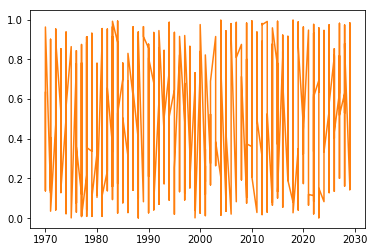

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
            2025, 2026, 2027, 2028, 2029],
           dtype='int64', name='year')

In [269]:
a, b = np.meshgrid(range(5),range(5,10))
a, b = a.ravel(), b.ravel()
a, b
d.index.levels[0][d.index.labels[0]]
d.index.get_level_values(1)
# import matplotlib.pyplot as plt
plt.plot(d.index.get_level_values('year'),d.a)
plt.show()
d.index.get_level_values(0)[::12]

In [255]:
# meshgrid behavior -- using lon as arg1, lat as arg2 puts lons on 
# ROWS, lats on COLUMNS (because row-major)... and this is what we 
# actually want for coordinates
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='moll', lon_0=0, resolution='c')
lon = np.arange(-180,181,60)
lat = np.arange(-90,91,30)
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)
lon2d, lat2d
# slice(1,5).indices()
np.array([1,2,3])[range(2)]
[i for i in slice(5)]


TypeError: 'slice' object is not iterable

In [580]:
# copying dataframe objects; must use .copy()
d1 = pd.DataFrame({'a':[1]})
d2 = d1.copy()
d1['a'] = 2
display('With copy:',d1)
display(d2)
# no copy
d1 = pd.DataFrame({'a':[1]})
d2 = d1
d1['a'] = 2
display('Without copy:',d1)
display(d2)

'With copy:'

,a
0,2


,a
0,1


'Without copy:'

,a
0,2


,a
0,2


[[ 0.29835707  0.87185528  0.44374559  0.9995076   0.57344217]
 [ 0.14311549  0.96260358  0.9124702   0.99789881  0.86540675]
 [ 0.01336667  0.85787327  0.27583628  0.09449624  0.87404768]
 [ 0.61459868  0.33153577  0.09867674  0.86802998  0.56437   ]
 [ 0.11496372  0.51702375  0.80827424  0.79665975  0.04770551]]
[ 0.29835707  0.87185528  0.44374559  0.9995076   0.57344217  0.14311549
  0.96260358  0.9124702   0.99789881  0.86540675  0.01336667  0.85787327
  0.27583628  0.09449624  0.87404768  0.61459868  0.33153577  0.09867674
  0.86802998  0.56437     0.11496372  0.51702375  0.80827424  0.79665975
  0.04770551]


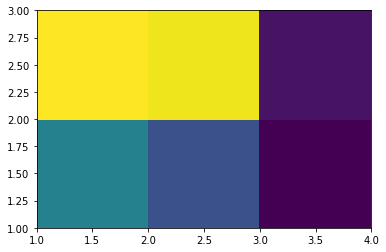

In [281]:
# pcolor: provide color polygon boundaries, and data to fill them
# also remember python is row-major; so rows of visual array match x
a = np.random.rand(5,5)
print(a)
print(a.ravel())
fig, ax = plt.subplots()
ax.pcolor(np.array([1,2,3,4]),np.array([1,2,3]), 
           np.random.rand(2,3))
plt.show()

# Utils testing

Help on method tight_layout in module matplotlib.figure:

tight_layout(renderer=None, pad=1.08, h_pad=None, w_pad=None, rect=None) method of matplotlib.figure.Figure instance
    Adjust subplot parameters to give specified padding.
    
    Parameters:
    
      pad : float
        padding between the figure edge and the edges of subplots,
        as a fraction of the font-size.
      h_pad, w_pad : float
        padding (height/width) between edges of adjacent subplots.
        Defaults to `pad_inches`.
      rect : if rect is given, it is interpreted as a rectangle
        (left, bottom, right, top) in the normalized figure
        coordinate that the whole subplots area (including
        labels) will fit into. Default is (0, 0, 1, 1).



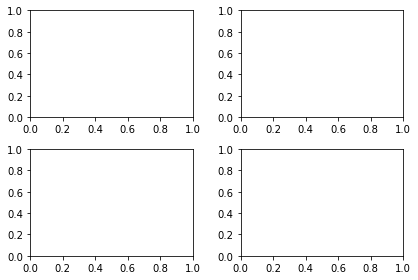

Help on method colorbar in module matplotlib.figure:

colorbar(mappable, cax=None, ax=None, use_gridspec=True, **kw) method of matplotlib.figure.Figure instance
    Create a colorbar for a ScalarMappable instance, *mappable*.
    
    Documentation for the pylab thin wrapper:
    
    
    Add a colorbar to a plot.
    
    Function signatures for the :mod:`~matplotlib.pyplot` interface; all
    but the first are also method signatures for the
    :meth:`~matplotlib.figure.Figure.colorbar` method::
    
      colorbar(**kwargs)
      colorbar(mappable, **kwargs)
      colorbar(mappable, cax=cax, **kwargs)
      colorbar(mappable, ax=ax, **kwargs)
    
    arguments:
    
      *mappable*
        the :class:`~matplotlib.image.Image`,
        :class:`~matplotlib.contour.ContourSet`, etc. to
        which the colorbar applies; this argument is mandatory for the
        :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
        :func:`~matplotlib.pyplot.colorbar` functi

In [291]:
help(fig.tight_layout)
fig, ax = plt.subplots(2,2)
fig.tight_layout()
plt.show()
help(fig.colorbar)

In [235]:
def completeyears(dt, startmonth=1):
    """
    Input...
        dt (positional, required): an ndarray of datetime objects
        startmonth (kw, optional): the starting month characterizing a "complete" 
            year (1 is default, but 12 is also common)
    Returns...
     1) list of filtered datetimes
     2) boolean ndarray vector that can be used to filter out complete years
        given some ndarray of ***monthly*** observation datetimes.
    """
    # some basic stuff
    vfunc = np.vectorize(lambda dt: dt.month)
    endmonth = ((startmonth - 2) % 12) + 1
    # get filter
    print(startmonth, endmonth, vfunc(dt))
    m_idstart = np.where(vfunc(dt)==startmonth)[0][0]
    m_idend = np.where(vfunc(dt)==endmonth)[0][-1]
    filt = np.arange(m_idstart, m_idend+1)
    
    return dt[filt], filt
        # returns only up to the last instance of last month


In [236]:
# Decomposing output
def f():
    return 1, (2, 3)
_, (_, b) = f()
print(b)

3


In [252]:
# Splitting stuff into pieces
a = np.random.randn(3,3)
print(a)
b = np.split(a, (1,2), axis=0)
    # can use integer for equal division, or tuple/list
    # division points (e.g. 1 splits 0 and 1:)
for i,b in enumerate(b):
    print(i, b)

[[ 0.64430346  0.60863589 -0.52278195]
 [-0.80632359  0.19060995  0.83636367]
 [ 0.55423935  1.18693875  0.11339143]]
0 [[ 0.64430346  0.60863589 -0.52278195]]
1 [[-0.80632359  0.19060995  0.83636367]]
2 [[ 0.55423935  1.18693875  0.11339143]]


In [261]:
# np.where behavior
np.where(np.array([1,2,3])==4)[0]
print(not np.array([]))
print(not np.array([0]))
for a in np.array([1,2,3]):
    print(type(a))

True
True
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [11]:
list(globals().keys())

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__builtin__',
 '__builtins__',
 '_ih',
 '_oh',
 '_dh',
 '_sh',
 'In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 '_',
 '__',
 '___',
 '_i',
 '_ii',
 '_iii',
 '_i1',
 'np',
 'pd',
 'os',
 'mpl',
 'plt',
 'datetime',
 'timedelta',
 'clear_output',
 'my',
 'display',
 '_i2',
 '__file__',
 'ani',
 'GridSpec',
 'st',
 'Basemap',
 'glob',
 'data_get',
 'data_process',
 'plot_video',
 'window_annual',
 'window_continuous',
 'window_bymonth',
 'window_seasonal',
 'regress_annual',
 'regress_continuous',
 'regress_bymonth',
 'base',
 'base_old',
 'base_new',
 'year',
 'month',
 'Tm',
 'completeyears',
 'climofix',
 'hadleymatch',
 'kwargs',
 'h_name',
 'c_name',
 'hc_name',
 'hT',
 'h',
 'cT',
 'c',
 'hcT',
 'hc',
 'be_climo_name',
 'be_name',
 'beT_climo',
 'be_climo',
 'beT',
 'be',
 'oi_name_climo',
 'oi_name',
 'oiT_climo',
 'oi_climo',
 'oiT',
 'oi',
 'ersst_template',
 'file_list',
 'erT0',
 'er',
 'erT',
 'i',
 'file'

In [238]:
# Generate monthly datetime sequence
a = np.array([datetime(2000,5,1)])
for i in range(1,48):
    a = np.append(a,datetime(a[-1].year + a[-1].month//12, (a[-1].month % 12)+1, a[-1].day))

In [239]:
print(completeyears(a, startmonth=5))

5 4 [ 5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5
  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4]
(array([datetime.datetime(2000, 5, 1, 0, 0),
       datetime.datetime(2000, 6, 1, 0, 0),
       datetime.datetime(2000, 7, 1, 0, 0),
       datetime.datetime(2000, 8, 1, 0, 0),
       datetime.datetime(2000, 9, 1, 0, 0),
       datetime.datetime(2000, 10, 1, 0, 0),
       datetime.datetime(2000, 11, 1, 0, 0),
       datetime.datetime(2000, 12, 1, 0, 0),
       datetime.datetime(2001, 1, 1, 0, 0),
       datetime.datetime(2001, 2, 1, 0, 0),
       datetime.datetime(2001, 3, 1, 0, 0),
       datetime.datetime(2001, 4, 1, 0, 0),
       datetime.datetime(2001, 5, 1, 0, 0),
       datetime.datetime(2001, 6, 1, 0, 0),
       datetime.datetime(2001, 7, 1, 0, 0),
       datetime.datetime(2001, 8, 1, 0, 0),
       datetime.datetime(2001, 9, 1, 0, 0),
       datetime.datetime(2001, 10, 1, 0, 0),
       datetime.datetime(2001, 11, 1, 0, 0),
       

In [182]:
def mesh(lon, lat):
    '''
    Gets graticule for full globe of longitude, latitude data.
    '''
    # fix lons
    lodiff = lon[1]-lon[0]
    hidiff = lon[-1]-lon[-2]
    lon = np.concatenate((
            np.array([lon[0]-lodiff/2]), (lon[1:]+lon[:-1])/2, np.array([lon[-1]+hidiff/2])
            ))
    # fix lats
    lat = np.concatenate((
            np.array([-90]), (lat[1:]+lat[:-1])/2, np.array([90])
            ))
    return lon, lat

testlon = np.arange(-180., 180., 30.)
testlat = np.arange(-85., 85.1, 10.)
mesh(testlon, testlat)

(array([-195., -165., -135., -105.,  -75.,  -45.,  -15.,   15.,   45.,
          75.,  105.,  135.,  165.]),
 array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.,
         20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]))

# Pandas testing

In [126]:
import pandas as pd
import os
d = os.getcwd()
d = d + '/Google Drive/Research/Project_LandSeaContrast'
os.listdir(d)
eri = pd.read_table(d + '/eri.txt',usecols=(5,6,7),skiprows=9,header=None,delim_whitespace=True) #, usecols=(6,7,8))
eri.values
#eri

array([[ 0.39,  0.46,  0.21],
       [ 0.43,  0.42,  0.47],
       [ 0.32,  0.34,  0.27],
       ..., 
       [ 0.48,  0.65,  0.12],
       [ 0.59,  0.71,  0.38],
       [ 0.54,  0.63,  0.33]])

# Graphics testing

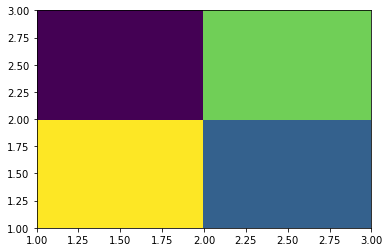

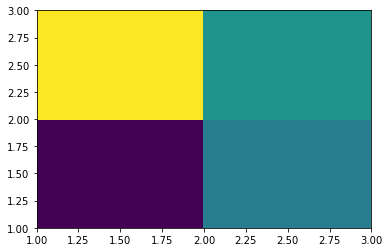

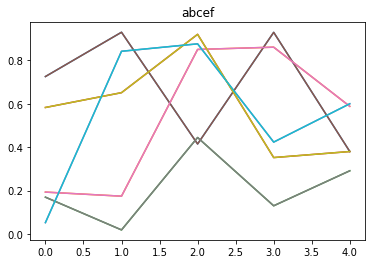

In [271]:
# do new graphics reset the axes title, labels, etc?
import matplotlib.pyplot as plt
a = np.random.rand(5,5)
fig, ax = plt.subplots()
ax.plot(a)
plt.title('abcef')
ax.plot(a)
plt.show()
fig, ax = plt.subplots()
p=ax.pcolor(a,cmap='Greys',clim=(0,0.5))
fig.colorbar(p)